# 1: Data Loading and Preparation
Load the dataset and check for missing values, especially in clear_date (indicating unpaid invoices) and other important fields like total_open_amount.

In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('D:\Data Sience project datasets/invoice_data.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [23]:
data=df[['cust_number','name_customer','invoice_id','total_open_amount','due_in_date','clear_date','invoice_currency',
          'buisness_year','isOpen']]
data.head()

,cust_number,name_customer,invoice_id,total_open_amount,due_in_date,clear_date,invoice_currency,buisness_year,isOpen
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210.0,2020-02-11 00:00:00,USD,2020.0,0
1,0200980828,BEN E,1.929646e+09,79656.60,20190811.0,2019-08-08 00:00:00,USD,2019.0,0
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929.0,2019-12-30 00:00:00,USD,2019.0,0
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410.0,NaN,CAD,2020.0,1
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128.0,2019-11-25 00:00:00,USD,2019.0,0


In [24]:
data.rename(columns={'cust_number':'Customer Number','name_customer':'Customer Name','invoice_id':'Invoice_ID',
                     'total_open_amount':'Invoice Amount','due_in_date':'Due Date','clear_date':'Payment Date',
                     'invoice_currency':'Invoice Currency','buisness_year':'Business Year','isOpen':'Invoice Status'},
           inplace=True)
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210.0,2020-02-11 00:00:00,USD,2020.0,0
1,0200980828,BEN E,1.929646e+09,79656.60,20190811.0,2019-08-08 00:00:00,USD,2019.0,0
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929.0,2019-12-30 00:00:00,USD,2019.0,0
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410.0,NaN,CAD,2020.0,1
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128.0,2019-11-25 00:00:00,USD,2019.0,0


In [25]:
data.shape

(50000, 9)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Number   50000 non-null  object 
 1   Customer Name     50000 non-null  object 
 2   Invoice_ID        49994 non-null  float64
 3   Invoice Amount    50000 non-null  float64
 4   Due Date          50000 non-null  float64
 5   Payment Date      40000 non-null  object 
 6   Invoice Currency  50000 non-null  object 
 7   Business Year     50000 non-null  float64
 8   Invoice Status    50000 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 3.4+ MB


In [27]:
data=data.astype({'Due Date':'int','Business Year':'int'})

In [28]:
data['Invoice Integer']=data['Invoice Amount'].astype(int)
data['Invoice Decimal']=data['Invoice Amount']-data['Invoice Integer']
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Invoice Integer,Invoice Decimal
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210,2020-02-11 00:00:00,USD,2020,0,54273,0.28
1,0200980828,BEN E,1.929646e+09,79656.60,20190811,2019-08-08 00:00:00,USD,2019,0,79656,0.60
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929,2019-12-30 00:00:00,USD,2019,0,2253,0.86
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410,NaN,CAD,2020,1,3299,0.70
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128,2019-11-25 00:00:00,USD,2019,0,33133,0.29


In [29]:
def convert_decimal(decimal):
    if decimal > 0.50:
        return 1
    else:
        return 0
data['Invoice Decimal']=data['Invoice Decimal'].apply(convert_decimal)
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Invoice Integer,Invoice Decimal
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210,2020-02-11 00:00:00,USD,2020,0,54273,0
1,0200980828,BEN E,1.929646e+09,79656.60,20190811,2019-08-08 00:00:00,USD,2019,0,79656,1
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929,2019-12-30 00:00:00,USD,2019,0,2253,1
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410,NaN,CAD,2020,1,3299,1
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128,2019-11-25 00:00:00,USD,2019,0,33133,0


In [30]:
data['Total Invoice Amount']=data['Invoice Integer'] + data['Invoice Decimal']
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Invoice Integer,Invoice Decimal,Total Invoice Amount
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210,2020-02-11 00:00:00,USD,2020,0,54273,0,54273
1,0200980828,BEN E,1.929646e+09,79656.60,20190811,2019-08-08 00:00:00,USD,2019,0,79656,1,79657
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929,2019-12-30 00:00:00,USD,2019,0,2253,1,2254
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410,NaN,CAD,2020,1,3299,1,3300
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128,2019-11-25 00:00:00,USD,2019,0,33133,0,33133


# Data Cleaning

In [31]:
data.isnull().sum()

Customer Number             0
Customer Name               0
Invoice_ID                  6
Invoice Amount              0
Due Date                    0
Payment Date            10000
Invoice Currency            0
Business Year               0
Invoice Status              0
Invoice Integer             0
Invoice Decimal             0
Total Invoice Amount        0
dtype: int64

In [32]:
data['Payment Date']=data['Payment Date'].fillna(method='ffill')
data['Payment Date']=data['Payment Date'].fillna(method='bfill')
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Invoice Integer,Invoice Decimal,Total Invoice Amount
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,20200210,2020-02-11 00:00:00,USD,2020,0,54273,0,54273
1,0200980828,BEN E,1.929646e+09,79656.60,20190811,2019-08-08 00:00:00,USD,2019,0,79656,1,79657
2,0200792734,MDV/ trust,1.929874e+09,2253.86,20190929,2019-12-30 00:00:00,USD,2019,0,2253,1,2254
3,0140105686,SYSC llc,2.960623e+09,3299.70,20200410,2019-12-30 00:00:00,CAD,2020,1,3299,1,3300
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,20191128,2019-11-25 00:00:00,USD,2019,0,33133,0,33133


In [33]:
data.dropna(subset=['Invoice_ID'],inplace=True)

In [34]:
data.isnull().sum()

Customer Number         0
Customer Name           0
Invoice_ID              0
Invoice Amount          0
Due Date                0
Payment Date            0
Invoice Currency        0
Business Year           0
Invoice Status          0
Invoice Integer         0
Invoice Decimal         0
Total Invoice Amount    0
dtype: int64

In [35]:
data['Due Date']=data['Due Date'].astype(str)

In [36]:
data['Due Date'] = pd.to_datetime(data['Due Date'], format='%Y%m%d')
data.head()

,Customer Number,Customer Name,Invoice_ID,Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Invoice Integer,Invoice Decimal,Total Invoice Amount
0,0200769623,WAL-MAR corp,1.930438e+09,54273.28,2020-02-10,2020-02-11 00:00:00,USD,2020,0,54273,0,54273
1,0200980828,BEN E,1.929646e+09,79656.60,2019-08-11,2019-08-08 00:00:00,USD,2019,0,79656,1,79657
2,0200792734,MDV/ trust,1.929874e+09,2253.86,2019-09-29,2019-12-30 00:00:00,USD,2019,0,2253,1,2254
3,0140105686,SYSC llc,2.960623e+09,3299.70,2020-04-10,2019-12-30 00:00:00,CAD,2020,1,3299,1,3300
4,0200769623,WAL-MAR foundation,1.930148e+09,33133.29,2019-11-28,2019-11-25 00:00:00,USD,2019,0,33133,0,33133


In [37]:
DA=data[['Customer Number','Customer Name','Invoice_ID','Total Invoice Amount','Due Date','Payment Date','Invoice Currency',
        'Business Year','Invoice Status']]
DA.head()

,Customer Number,Customer Name,Invoice_ID,Total Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status
0,0200769623,WAL-MAR corp,1.930438e+09,54273,2020-02-10,2020-02-11 00:00:00,USD,2020,0
1,0200980828,BEN E,1.929646e+09,79657,2019-08-11,2019-08-08 00:00:00,USD,2019,0
2,0200792734,MDV/ trust,1.929874e+09,2254,2019-09-29,2019-12-30 00:00:00,USD,2019,0
3,0140105686,SYSC llc,2.960623e+09,3300,2020-04-10,2019-12-30 00:00:00,CAD,2020,1
4,0200769623,WAL-MAR foundation,1.930148e+09,33133,2019-11-28,2019-11-25 00:00:00,USD,2019,0


# 2. Identify Open and Closed Invoices
Open invoices are those where isOpen is True or clear_date is missing, while closed invoices have a recorded clear_date.

In [38]:
# Identify open and closed invoices
open_invoice=DA[DA['Invoice Status']==True]
close_invoice=DA[DA['Invoice Status']==False]

# Identify open and closed invoices
print(f'Open Invoice: {len(open_invoice)}')
print(f'Close Invoice: {len(close_invoice)}')

Open Invoice: 10000
Close Invoice: 39994


# 3. Calculate Days Outstanding for Unpaid Invoices
For unpaid invoices, calculate how many days they have been outstanding based on the due_in_date.

In [43]:
# Calculate days outstanding for open invoices
open_invoice['Days Outstanding']=(pd.Timestamp.today() - open_invoice['Due Date']).dt.days
open_invoice[['Invoice_ID','Due Date','Days Outstanding']].head()

,Invoice_ID,Due Date,Days Outstanding
3,2.960623e+09,2020-04-10,1636
7,1.930659e+09,2020-04-03,1643
10,1.930611e+09,2020-03-26,1651
14,1.930788e+09,2020-04-30,1616
15,1.930817e+09,2020-04-26,1620


# 4. Aging Buckets
Create aging buckets to categorize how overdue the invoices are. For instance, you can categorize them as "Current," "0-30 Days," "31-60 Days," etc.# 

In [44]:
# Function to categorize invoices into aging buckets
def aging_buckets(days):
    if days < 0:
        return 'Current'
    elif days <= 30:
        return '0-30 Days'
    elif days <= 60:
        return '31-60 Days'
    else:
        return '61+ Days'
# Apply aging bucket function to open invoices   
open_invoice['Aging Buckets']=open_invoice['Days Outstanding'].apply(aging_buckets)

# Count the number of invoices in each aging bucket
aging_summary=open_invoice['Aging Buckets'].value_counts()
print(aging_summary)    

61+ Days    10000
Name: Aging Buckets, dtype: int64


# 5. Calculate Collection Efficiency and Days Sales Outstanding (DSO)
You can calculate Collection Efficiency and Days Sales Outstanding (DSO) to evaluate AR performance.

In [45]:
# Calculate Collection Efficiency
total_open_amount=DA['Total Invoice Amount'].sum()
total_collected_amount=close_invoice['Total Invoice Amount'].sum()
collected_efficiency=(total_collected_amount / total_open_amount) * 100
print(f'Collection Efficiency: {collected_efficiency:.2f}%')
      
# Calculate DSO (Days Sales Outstanding)
dso=open_invoice['Days Outstanding'].mean()
print(f'Days Sales Outstanding (DSO): {dso:.2f} days')

Collection Efficiency: 79.33%
Days Sales Outstanding (DSO): 1628.19 days


# 6. Overdue Invoices Analysis
- Calculate how many invoices are overdue.
- Identify the percentage of invoices that are past due and their respective amounts.
- Group overdue invoices by customer to identify the customers with the highest overdue balances.

In [46]:
# Convert 'Payment Date' to datetime
DA['Payment Date']=pd.to_datetime(DA['Payment Date'])
DA.head(3)

,Customer Number,Customer Name,Invoice_ID,Total Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status
0,0200769623,WAL-MAR corp,1.930438e+09,54273,2020-02-10,2020-02-11,USD,2020,0
1,0200980828,BEN E,1.929646e+09,79657,2019-08-11,2019-08-08,USD,2019,0
2,0200792734,MDV/ trust,1.929874e+09,2254,2019-09-29,2019-12-30,USD,2019,0


In [47]:
# Calculate overdue invoices (Invoices where the payment date is after the due date)
DA['Over Due']=(DA['Payment Date'] - DA['Due Date']).dt.days
DA.head()

,Customer Number,Customer Name,Invoice_ID,Total Invoice Amount,Due Date,Payment Date,Invoice Currency,Business Year,Invoice Status,Over Due
0,0200769623,WAL-MAR corp,1.930438e+09,54273,2020-02-10,2020-02-11,USD,2020,0,1
1,0200980828,BEN E,1.929646e+09,79657,2019-08-11,2019-08-08,USD,2019,0,-3
2,0200792734,MDV/ trust,1.929874e+09,2254,2019-09-29,2019-12-30,USD,2019,0,92
3,0140105686,SYSC llc,2.960623e+09,3300,2020-04-10,2019-12-30,CAD,2020,1,-102
4,0200769623,WAL-MAR foundation,1.930148e+09,33133,2019-11-28,2019-11-25,USD,2019,0,-3


In [48]:
overdue_invoices=DA[DA['Over Due'] >  0]

In [49]:
# Number and percentage of overdue invoices
num_overdue_invoice=overdue_invoices.shape[0]
percentage_overdue=(num_overdue_invoice/DA.shape[0]) * 100
print(f'Number of overdue invoices: {num_overdue_invoice}')
print(f'Percentage of overdue invoices: {percentage_overdue:.2f}%')

Number of overdue invoices: 16787
Percentage of overdue invoices: 33.58%


# 7. Customer Payment Performance
- Analyze payment delays by customer to identify which customers are consistently late.
- Calculate the average number of days it takes each customer to pay their invoices.

In [50]:
# Group by customer to calculate average payment delay
Customer_payment_delay=DA.groupby('Customer Name')['Over Due'].mean().reset_index()
Customer_payment_delay.columns=['Customer Name','Average Payment Delay']

Customer_payment_delay=Customer_payment_delay.sort_values(by='Average Payment Delay',ascending=False)
Customer_payment_delay

,Customer Name,Average Payment Delay
1710,HEINZ us,123.0
2317,LOUD associates,121.0
2634,MIV us,120.0
4154,WOOD F in,120.0
69,AL MAJ corp,115.0
...,...,...
1155,DUTCH systems,-458.0
822,CORE-M,-463.0
2280,LIDE llc,-465.0
198,AR associates,-482.0


# 8. Currency-Wise Invoice Distribution
- Explore how invoices are distributed across different currencies.
- This helps to identify if any particular currency has more overdue invoices or delayed payments.

In [51]:
Currency_Analysis=DA.groupby('Invoice Currency')['Total Invoice Amount'].sum().reset_index()
Currency_Analysis

,Invoice Currency,Total Invoice Amount
0,CAD,220457600
1,USD,1396366322


# 9. Invoice Status Insights
- Analyze the proportion of open (unpaid) vs closed (paid) invoices.
- This can give a quick overview of the current financial standing in terms of outstanding receivables.

In [52]:
invoice_status=DA['Invoice Status'].value_counts(normalize=True) * 100
invoice_status

0    79.9976
1    20.0024
Name: Invoice Status, dtype: float64

# 5. Top 10 Customers by Invoice Amount
- Find out which customers have the largest outstanding invoices.
- This helps to prioritize collections efforts and focus on high-value clients.

In [53]:
Top_customers=DA.groupby('Customer Name')['Total Invoice Amount'].sum().nlargest(10).reset_index()
Top_customers

,Customer Name,Total Invoice Amount
0,WAL-MAR llc,26817572
1,WAL-MAR co,25694731
2,WAL-MAR corp,25247966
3,WAL-MAR,25231425
4,WAL-MAR corporation,25097241
5,WAL-MAR trust,24950278
6,WAL-MAR associates,24925329
7,WAL-MAR us,24773232
8,WAL-MAR systems,24629154
9,WAL-MAR in,24407786


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


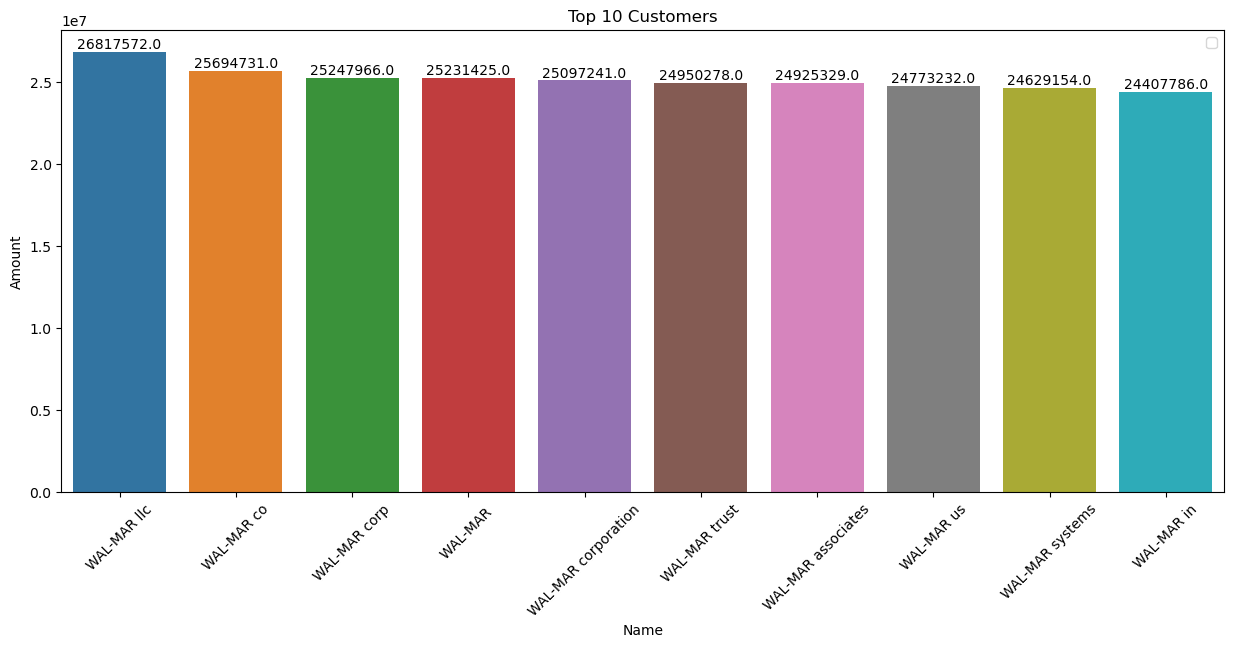

In [54]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='Customer Name', y='Total Invoice Amount',data=Top_customers)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x() + p.get_width() / 2.,height),ha='center', va='center',xytext=(0,5),
                textcoords='offset points')
plt.title('Top 10 Customers')
plt.ylabel('Amount')
plt.xlabel('Name')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 10. Yearly Trends
- Analyze how invoice amounts and overdue payments have changed over the years.
- This helps identify any seasonal trends or financial growth/decline. 

In [55]:
Yearly_trend=DA.groupby('Business Year')['Total Invoice Amount'].sum().reset_index()
Yearly_trend

,Business Year,Total Invoice Amount
0,2019,1120075467
1,2020,496748455


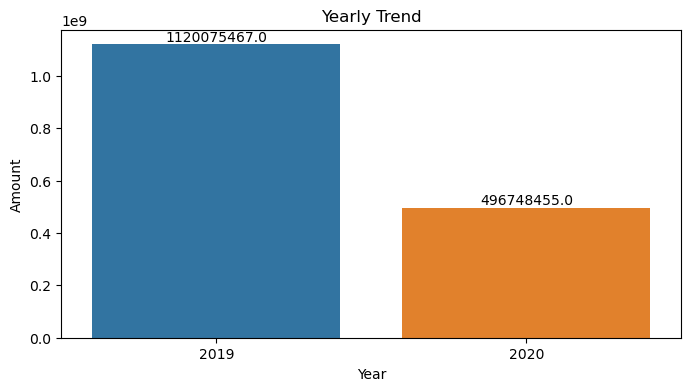

In [56]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='Business Year',y='Total Invoice Amount',data=Yearly_trend)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x() + p.get_width() / 2.,height),ha='center', va='center',xytext=(0,5),
                textcoords='offset points')
plt.title('Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [96]:
# Extract month and year from the payment date
DA['Payment_Month'] = DA['Payment Date'].dt.to_period('M')

# Group by month to calculate the sum of paid invoices
Monthly_Cash_Flow = DA.groupby('Payment_Month')['Total Invoice Amount'].sum().reset_index()
Monthly_Cash_Flow['Payment Month'] = Monthly_Cash_Flow['Payment_Month'].astype(str)
Monthly_Cash_Flow = Monthly_Cash_Flow.drop('Payment_Month',axis=1)
Monthly_Cash_Flow[['Payment Month','Total Invoice Amount']]

,Payment Month,Total Invoice Amount
0,2019-01,52153709
1,2019-02,101633914
2,2019-03,115355459
3,2019-04,121067555
4,2019-05,134513442
5,2019-06,111406436
6,2019-07,128071214
7,2019-08,121817647
8,2019-09,119282412
9,2019-10,130364972


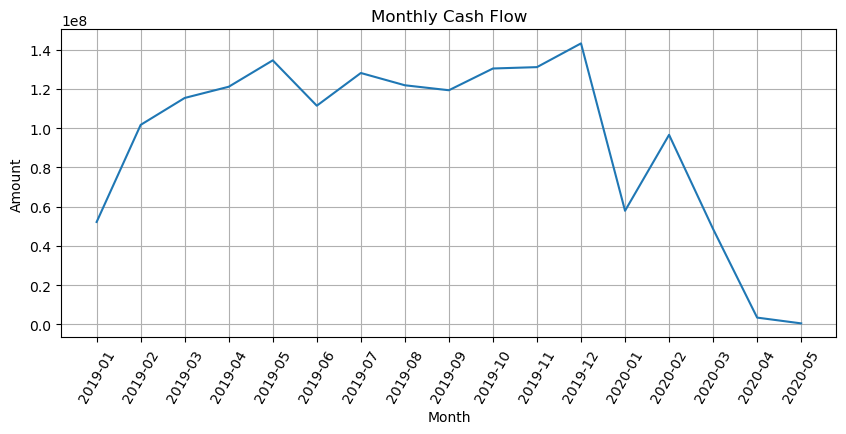

In [99]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Payment Month', y='Total Invoice Amount', data=Monthly_Cash_Flow)
plt.title('Monthly Cash Flow')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [119]:
high_risk_customers = DA[(DA['Over Due'] > 60) & (DA['Total Invoice Amount'] > DA['Total Invoice Amount'].mean())]
high_risk_customers = high_risk_customers.groupby('Customer Name')['Total Invoice Amount'].sum().reset_index()
high_risk_customers.sort_values(by = 'Total Invoice Amount',ascending=False)

,Customer Name,Total Invoice Amount
14,THE corp,457640
11,THE,230882
19,THE systems,191587
21,THE us,169390
15,THE corporation,159053
18,THE llc,143682
20,THE trust,109007
10,SUPE us,98246
16,THE foundation,89584
13,THE co,89496
